In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sns

%matplotlib inline

In [2]:
Hdata = pd.read_csv("echocardiogram.csv", usecols=[0,1,2,3,4,5,6,7,8],
                   names= ("MthLive", "Alive","Age","Fluid","Contracility",
                           "EPSS","LVDD", "WallMotion","WM_index"),
                   na_values='?')

# name, mult, group are deemed irrelevant for this study. alive-at-1 can be ascertained by mthlive
#Refer to documentation: echocardiogram.names.txt

# these columns omitted from read file with usecols=... 0:8 did not work for some reason...
# there was a ? entry that encoded all series as objects (mix), rather than ready for math!
# all variables were imported as float64. Should Fluid, Alive be booleon.. what about others integers?

In [3]:
Hdata['Alive'] = Hdata['Alive'].astype('bool')
Hdata['Fluid'] = Hdata['Fluid'].astype('bool')

In [4]:
Hdata.mean()

MthLive         22.182923
Alive            0.333333
Age             62.925425
Fluid            0.189394
Contracility     0.216734
EPSS            12.164769
LVDD             4.763157
WallMotion      14.438125
WM_index         1.382748
dtype: float64

In [32]:
Hdata.count()

MthLive         130
Alive           132
Age             127
Fluid           132
Contracility    124
EPSS            117
LVDD            121
WallMotion      128
WM_index        131
dtype: int64

In [6]:
Hdata.groupby('Alive').corr()

Age  Contracility      EPSS     Fluid      LVDD  \
Alive                                                                      
False Age           1.000000     -0.027856 -0.051866  0.007462  0.183123   
      Contracility -0.027856      1.000000 -0.325989 -0.034798 -0.292048   
      EPSS         -0.051866     -0.325989  1.000000  0.013253  0.548062   
      Fluid         0.007462     -0.034798  0.013253  1.000000  0.005042   
      LVDD          0.183123     -0.292048  0.548062  0.005042  1.000000   
      MthLive      -0.001913      0.080683 -0.120858 -0.050840 -0.109126   
      WM_index      0.083385     -0.163725  0.317492  0.125409  0.118869   
      WallMotion    0.029264     -0.100848  0.275306  0.093873  0.037020   
True  Age           1.000000      0.099351 -0.061565 -0.065018 -0.091085   
      Contracility  0.099351      1.000000 -0.210446  0.226363 -0.302031   
      EPSS         -0.061565     -0.210446  1.000000  0.033347  0.685494   
      Fluid        -0.065018      0.226363  0.033347  1.000000  0.057392   
      LVDD         -0.091085     -0.302031  0.685494  0.057392  1.000000   
      MthLive       0.028391     -0.046730 -0.002683 -0.011989  0.134096   
      WM_index     -0.235190     -0.205617  0.324679  0.040667  0.282695   
      WallMotion   -0.162611     -0.153554  0.360148  0.119247  0.157954   

                     MthLive  WM_index  WallMotion  
Alive                                               
False Age          -0.001913  0.083385    0.029264  
      Contracility  0.080683 -0.163725   -0.100848  
      EPSS         -0.120858  0.317492    0.275306  
      Fluid        -0.050840  0.125409    0.093873  
      LVDD         -0.109126  0.118869    0.037020  
      MthLive       1.000000 -0.068517   -0.123184  
      WM_index     -0.068517  1.000000    0.707783  
      WallMotion   -0.123184  0.707783    1.000000  
True  Age           0.028391 -0.235190   -0.162611  
      Contracility -0.046730 -0.205617   -0.153554  
      EPSS         -0.002683  0.324679    0.360148  
      Fluid        -0.011989  0.040667    0.119247  
      LVDD          0.134096  0.282695    0.157954  
      MthLive       1.000000 -0.235580   -0.220395  
      WM_index     -0.235580  1.000000    0.536202  
      WallMotion   -0.220395  0.536202    1.000000

In [7]:
Hdata.corr()

,MthLive,Alive,Age,Fluid,Contracility,EPSS,LVDD,WallMotion,WM_index
MthLive,1.000000,-0.711073,-0.207691,-0.153606,0.241328,-0.295099,-0.230969,-0.292460,-0.354789
Alive,-0.711073,1.000000,0.309236,0.191404,-0.294011,0.330701,0.264787,0.272232,0.395926
Age,-0.207691,0.309236,1.000000,0.041149,-0.083279,0.045540,0.173159,0.035560,0.069187
Fluid,-0.153606,0.191404,0.041149,1.000000,-0.009492,0.073149,0.063501,0.143504,0.142396
Contracility,0.241328,-0.294011,-0.083279,-0.009492,1.000000,-0.357718,-0.349243,-0.171558,-0.248676
EPSS,-0.295099,0.330701,0.045540,0.073149,-0.357718,1.000000,0.624183,0.371534,0.405519
LVDD,-0.230969,0.264787,0.173159,0.063501,-0.349243,0.624183,1.000000,0.146372,0.247416
WallMotion,-0.292460,0.272232,0.035560,0.143504,-0.171558,0.371534,0.146372,1.000000,0.645427
WM_index,-0.354789,0.395926,0.069187,0.142396,-0.248676,0.405519,0.247416,0.645427,1.000000


/Users/julianhaigh/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/julianhaigh/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


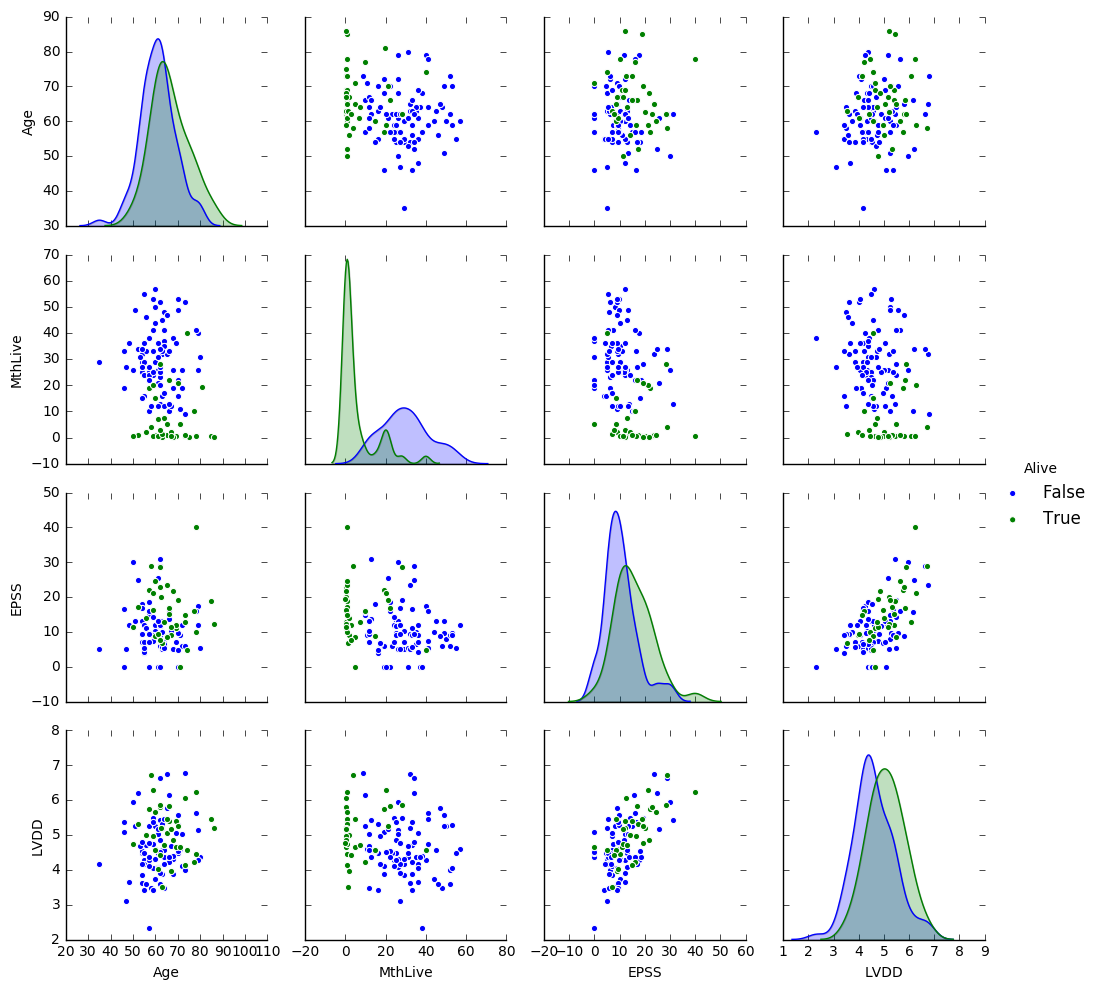

In [23]:
sns.pairplot(data=Hdata, 
             vars= ('Age','MthLive','EPSS', 'LVDD'),  
             hue='Alive')

In [50]:
Dead = Hdata[Hdata['Alive'] == False]
Dead.drop(columns='Alive').corr()

,MthLive,Age,Fluid,Contracility,EPSS,LVDD,WallMotion,WM_index
MthLive,1.000000,-0.001913,-0.050840,0.080683,-0.120858,-0.109126,-0.123184,-0.068517
Age,-0.001913,1.000000,0.007462,-0.027856,-0.051866,0.183123,0.029264,0.083385
Fluid,-0.050840,0.007462,1.000000,-0.034798,0.013253,0.005042,0.093873,0.125409
Contracility,0.080683,-0.027856,-0.034798,1.000000,-0.325989,-0.292048,-0.100848,-0.163725
EPSS,-0.120858,-0.051866,0.013253,-0.325989,1.000000,0.548062,0.275306,0.317492
LVDD,-0.109126,0.183123,0.005042,-0.292048,0.548062,1.000000,0.037020,0.118869
WallMotion,-0.123184,0.029264,0.093873,-0.100848,0.275306,0.037020,1.000000,0.707783
WM_index,-0.068517,0.083385,0.125409,-0.163725,0.317492,0.118869,0.707783,1.000000


In [49]:
Alives = Hdata[Hdata['Alive'] == True]
Alives.drop(columns='Alive').corr()

,MthLive,Age,Fluid,Contracility,EPSS,LVDD,WallMotion,WM_index
MthLive,1.000000,0.028391,-0.011989,-0.046730,-0.002683,0.134096,-0.220395,-0.235580
Age,0.028391,1.000000,-0.065018,0.099351,-0.061565,-0.091085,-0.162611,-0.235190
Fluid,-0.011989,-0.065018,1.000000,0.226363,0.033347,0.057392,0.119247,0.040667
Contracility,-0.046730,0.099351,0.226363,1.000000,-0.210446,-0.302031,-0.153554,-0.205617
EPSS,-0.002683,-0.061565,0.033347,-0.210446,1.000000,0.685494,0.360148,0.324679
LVDD,0.134096,-0.091085,0.057392,-0.302031,0.685494,1.000000,0.157954,0.282695
WallMotion,-0.220395,-0.162611,0.119247,-0.153554,0.360148,0.157954,1.000000,0.536202
WM_index,-0.235580,-0.235190,0.040667,-0.205617,0.324679,0.282695,0.536202,1.000000


In [58]:
Bitpart = Alives[['MthLive','Age', 'EPSS']]
Bitpart.corr()

,MthLive,Age,EPSS
MthLive,1.000000,0.028391,-0.002683
Age,0.028391,1.000000,-0.061565
EPSS,-0.002683,-0.061565,1.000000
